In [1]:
import pandas as pd

dat_df = pd.read_csv('C:/Users/jy990/OneDrive/바탕 화면/뇌/2022/2022/Python/머신러닝데이터 전처리입문/데이터셋/chap3_4_6_7_A1-5/chap6/data/energydata.csv', sep=',')[['date', 'Appliances']]
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')

dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


<function matplotlib.pyplot.show(close=None, block=None)>

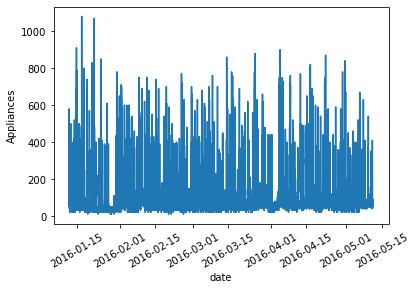

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30) # x축 레이블이 겹쳐서 30도 회전시켰다.
plt.ylabel('Appliances')
plt.show

In [3]:
train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [4]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()
train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']]) # 데이터 값이 0에서 1 사이가 되도록 정규화한다.

In [5]:
width = 144
train = train.flatten()
train_vec=[]

for i in range(len(train)-width) :
    train_vec.append(train[i:i+width]) # 슬라이드 창을 옮겨가며 부분시계열을 작성한다.

print(pd.DataFrame(train_vec).shape)
pd.DataFrame(train_vec).head()

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794


In [6]:
test = test.flatten()
test_vec = []

for i in range(len(test)-width) :
    test_vec.append(test[i:i+width])
    
print(pd.DataFrame(test_vec).shape)
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


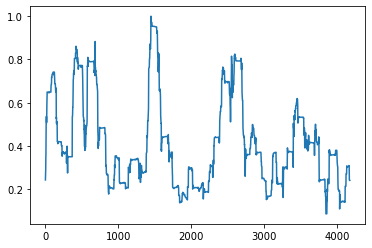

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors=1) # 가장 가까운 파형과 거리를 측정하는 k-NN 모델을 작성한다. k=1
model.fit(train_vec)

dist, _ = model.kneighbors(test_vec) 
dist = dist/np.max(dist) # 작성한 모델을 테스트 데이터에 적용하고 거리를 측정한다. 그리고 거리를 정규화한다.

plt.plot(dist)
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # Sequential 모델 작성
model.add(Dense(128, activation='relu', input_shape=(144,))) # 입력층 144 설정
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu')) # 중간층 5개 만들고 활성화 함수로 relu 사용
model.add(Dense(144, activation='sigmoid')) # 출력층은 입력과 마찬가지로 노드수 144이고 활성화함수로 sigmoid 사용

model.summary() # 작성한 네트워크 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               18560     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 144)               18576     
                                                                 
Total params: 57,904
Trainable params: 57,904
Non-traina

In [10]:
model.compile(loss='mse', optimizer='adam') # 학습 조건을 설정한다. 오차함수 loss는 MSE로 설정하고, 최적화 방법은 adam으로 설정한다.
hist = model.fit(train_vec, train_vec, batch_size=128, verbose=1, epochs=20, validation_split=0.2)
# 설명변수 train_vec, 목적변수 train_vec, 미니 배치수 128, 학습 상황의 진척도 표시 형식을 1(ver로 표시), Epoch 수 20, 훈련데이터 중
# 검증에 사용하는 데이터의 비율을 0.2로 설정한다.

Epoch 1/20
81/81 [==============================] - 1s 8ms/step - loss: 0.0509 - val_loss: 0.0169
Epoch 2/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 3/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0167
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0142
Epoch 5/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0086
Epoch 6/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.0070
Epoch 7/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 8/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0055
Epoch 9/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 10/20
81/81 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 11/20
81/81 [

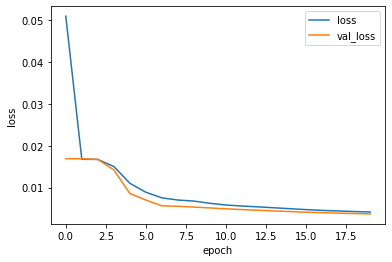

In [14]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

131/131 [==============================] - 0s 2ms/step


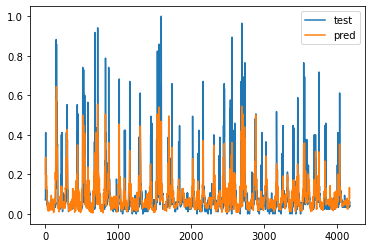

In [15]:
pred = model.predict(test_vec) # 학습한 모델 model에 테스트 데이터 test_vec을 적용하고 출력값 pred를 확보한다.

plt.plot(test_vec[:,0], label='test')
plt.plot(pred[:,0], label='pred')
plt.legend()
plt.show()

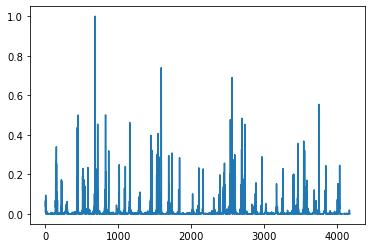

In [17]:
dist = test_vec[:,0]-pred[:,0]
dist = pow(dist, 2) # 양이나 음의 값을 취하기 때문에 제곱한다.
dist = dist / np.max(dist) # 0과 1 사이로 정규화한다.

plt.plot(dist)
plt.show()